# Kalman Filter
O modelo não linear da atitide é dado por:
$$
\begin{align*}
	\begin{split}
		\dot{\phi}&=(rC_\phi + q S_\phi) T_\theta + p\\
		\dot{\theta}&=qC_\phi  - r S_\phi\\
		\dot{\psi}&=\frac{C_\phi }{C_\theta}r + \frac{S_\phi}{C_\theta}q\\
	\dot{p}&=\left(\dfrac{{I_{yy}}  - {I_{zz}}}{I_{x x}}\right)qr -\frac{{I_r}\Omega_r }{{I_{xx}}}q + \dfrac{{U_2}}{I_{x x}}\\
	\dot{q}&=\left(\dfrac{{I_{zz}} - {I_{x x}}}{I_{y y}}\right) p r +  \frac{{I_r} {\Omega_r} }{{I_{yy}}}p + \dfrac{{U_3}}{I_{y y}}\\
	\dot{r}&=\left(\frac{{I_{xx}} - {I_{yy}}}{I_{zz}}\right) p q + \dfrac{{U_4}}{{I_{zz}}}
	\end{split}
\end{align*}
$$
O modelo linear é
$$
\begin{align*}
	\begin{split}
		\dot{x}_1 &= x_4\\
		\dot{x}_2 &= x_5\\
		\dot{x}_3 &= x_6\\
		\dot{x}_4 &=-\frac{{I_r} {\Omega_r} x_{5}}{{I_{xx}}} + \frac{{U_2}}{{I_{xx}}}\\
		\dot{x}_5 &= \frac{{I_r} {\Omega_r} x_{4}}{{I_{yy}}} + \frac{{U_3}}{{I_{yy}}}\\
		\dot{x}_6 &= \frac{{U_4}}{{I_{zz}}}
	\end{split}
\end{align*}
$$
onde $x=(\phi,\theta,\psi,p,q,r)^T=(x_1,\ldots,x_6)^T$. Na forma matricial temos:
$$
\dot{x}=Ax+Bu
$$
onde
$$
A =\begin{pmatrix}
0&0&0&1&0&0\\
0&0&0&0&1&0\\
0&0&0&0&0&1\\
0&0&0&0&-\frac{{I_r} {\Omega_r}}{{I_{xx}}}&0\\
0&0&0&\frac{{I_r} {\Omega_r}}{{I_{yy}}}&0&0\\
0&0&0&0&0&0
\end{pmatrix},~
B=\begin{pmatrix}
0&0&0\\
0&0&0\\
0&0&0\\
 \frac{{1}}{{I_{xx}}}&0&0\\
0&\frac{{1}}{{I_{yy}}}&0\\
0&0&\frac{{1}}{{I_{zz}}}
\end{pmatrix}
$$
e $u=(U_1,U_2,U_3)^T$, 

* $U_1$ representa o torque em $\phi$,
* $U_2$ representa o torque em $\theta$,
* $U_3$ representa o torque em $\psi$.

$\Omega_r=-\Omega_1+\Omega_2-\Omega_3+\Omega_4$, $\Omega_i,~i=1,\ldots,4$ é a velocidade angular em rad/seg do $i$-ésimo motor. Os parâmetros do sistema são os momentos de inercia $I_{xx}, I_{yy}$ e $I_{zz}$ e o momento de inercia dos motores $I_r$.

O modelo linear discretizado é
$$
x(k+1)=(I_d+\Delta tA)x(k)+\Delta tBu(k)
$$
onde $I_d$ é a matriz identidade de ordem 6 e $\Delta t$ é o intervalo de tempoo entre amostras. Em notação de filtro de Kalman temos:
$$
\hat{x}_{k+1}^-=\Phi_k \hat{x}_k^+ + \Gamma_k u_k
$$
onde 
$$
\Phi_k :=(I_d+\Delta tA), ~\Gamma_k :=\Delta tB.
$$
Aqui $\hat{x}$ é o valor estimado. $\hat{x}^+$ é o valor estimado incluída a informação disponível no instante $k$, entanto que $\hat{x}^-$ refere-se ao valor da grandeza $x$ antes de ter sido incluída a informação naquele instante.

Note que o valor real do estado do sistema pode ser descrito da seguinte forma,
$$

   {x}_{k+1}^-=\Phi_k {x}_k^+ + \Gamma_k u_k + \Upsilon_kw_k
$$

In [3]:
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
file_name = 'dados'
b = bagreader('../bags/' + file_name + '.bag')

[INFO]  Data folder ../bags/dados already exists. Not creating.


In [7]:
imu_data = b.message_by_topic(topic='/quad/imu')
imu_data_df = pd.read_csv(imu_data)
list(imu_data_df)

['Time',
 'header.seq',
 'header.stamp.secs',
 'header.stamp.nsecs',
 'header.frame_id',
 'orientation.x',
 'orientation.y',
 'orientation.z',
 'orientation.w',
 'orientation_covariance_0',
 'orientation_covariance_1',
 'orientation_covariance_2',
 'orientation_covariance_3',
 'orientation_covariance_4',
 'orientation_covariance_5',
 'orientation_covariance_6',
 'orientation_covariance_7',
 'orientation_covariance_8',
 'angular_velocity.x',
 'angular_velocity.y',
 'angular_velocity.z',
 'angular_velocity_covariance_0',
 'angular_velocity_covariance_1',
 'angular_velocity_covariance_2',
 'angular_velocity_covariance_3',
 'angular_velocity_covariance_4',
 'angular_velocity_covariance_5',
 'angular_velocity_covariance_6',
 'angular_velocity_covariance_7',
 'angular_velocity_covariance_8',
 'linear_acceleration.x',
 'linear_acceleration.y',
 'linear_acceleration.z',
 'linear_acceleration_covariance_0',
 'linear_acceleration_covariance_1',
 'linear_acceleration_covariance_2',
 'linear_accel

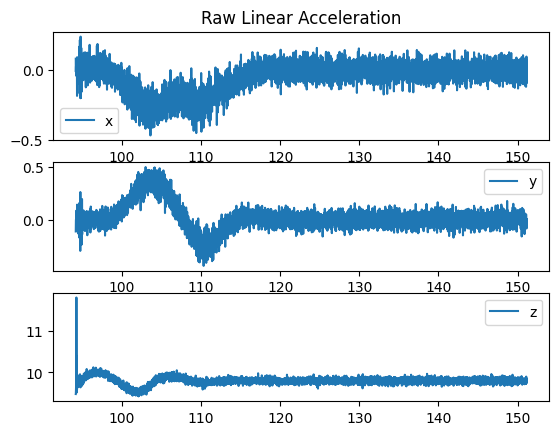

In [13]:
# Plotting the raw data from IMU
plt.subplot(3, 1, 1)
plt.title('Raw Linear Acceleration')
plt.plot(imu_data_df['Time'].to_numpy(), imu_data_df['linear_acceleration.x'].to_numpy(), label='x')
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(imu_data_df['Time'].to_numpy(), imu_data_df['linear_acceleration.y'].to_numpy(), label='y')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(imu_data_df['Time'].to_numpy(), imu_data_df['linear_acceleration.z'].to_numpy(), label='z')
plt.legend()
plt.show()

# Filtro de Kalman
Segundo Aguirre, 2015, o sistema pode ser descrito pelo seguinte modelo linear no espaço de estados:
$$
    \begin{align}
    x_{k+1} &= \Phi_kx_k+\Gamma_ku_k+\Upsilon_kw_k\\
    y_{k+1} &= H_{k+1}x_{k+1}+v_{k+1}
    \end{align}
$$
onde $w& e $v$ são variáveis aleatórios independentes de média nula, que satisfazem $E[w_kW_k^T]=Q_k$, $E[v_kv_k^T]=R_k$ e $E[v_iw_j^T]=0, \forall i,j$. Tomando como vetor de estado a posição, velocidade e aceleração, temos que $x_k=(x,y,x,v_x,v_y,v_z,a_x,a_y,a_z)$ e 
$$
\begin{align}
\Phi_k = \begin{pmatrix}
0&0&0&1&0&0&0&0&0\\
0&0&0&0&1&0&0&0&0\\
0&0&0&0&0&1&0&0&0\\
0&0&0&0&0&0&1&0&0\\
0&0&0&0&0&0&0&1&0\\
0&0&0&0&0&0&0&0&1\\
0&0&0&0&0&0&0&0&0\\
0&0&0&0&0&0&0&0&0\\
0&0&0&0&0&0&0&0&0
\end{pmatrix},
\Gamma_k=\begin{pmatrix}
0&0&0\\
0&0&0\\
0&0&0\\
0&0&0\\
0&0&0\\
0&0&0\\
1&0&0\\
0&1&0\\
0&0&1
\end{pmatrix}
\end{align}
$$
